In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
df = pd.read_csv("ML/LSTM/YahooFinance_Stock_2014-2019_train.csv")

In [4]:
df.shape

(1510, 6)

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2014-01-02,32.46,32.50,32.24,32.29,30632200
1,2014-01-03,32.33,32.35,31.81,32.08,31134800
2,2014-01-06,32.02,32.06,31.38,31.40,43603700
3,2014-01-07,31.57,31.71,31.47,31.64,35802800
4,2014-01-08,31.29,31.41,30.92,31.08,59971700
5,2014-01-09,31.18,31.21,30.76,30.88,36516300
6,2014-01-10,31.20,31.42,31.07,31.32,40548800
7,2014-01-13,31.28,31.30,30.27,30.40,45901900
8,2014-01-14,30.18,31.18,30.09,31.09,41623300
9,2014-01-15,31.20,31.97,31.15,31.95,44812600


In [6]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

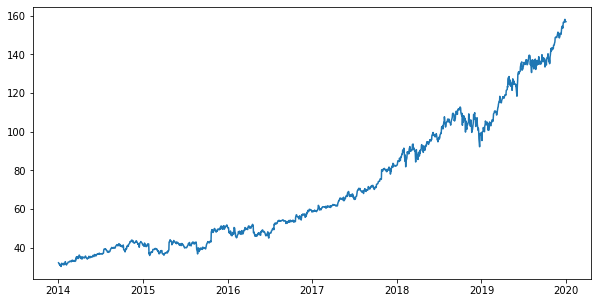

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])

In [10]:
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

days = 20

for i in range(0, len(data)):
    new_dataset['Date'][i] = data['Date'][i]
    new_dataset['Close'][i] = data['Close'][i]

new_dataset.index = new_dataset.Date
new_dataset.drop('Date', axis=1, inplace=True)

final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train, y_train = [], []

for i in range(days, len(train_data)):
    x_train.append(scaled_data[i-days:i, 0])
    y_train.append(scaled_data[i, 0])

    
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [16]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
lstm_model.compile(loss="mean_squared_error", optimizer="adam")

In [19]:
lstm_model.fit(x_train, y_train, epochs=7, batch_size=32, verbose=2)

Train on 967 samples
Epoch 1/7
967/967 - 8s - loss: 0.0075
Epoch 2/7
967/967 - 1s - loss: 0.0037
Epoch 3/7
967/967 - 1s - loss: 0.0027
Epoch 4/7
967/967 - 1s - loss: 0.0037
Epoch 5/7
967/967 - 1s - loss: 0.0034
Epoch 6/7
967/967 - 1s - loss: 0.0021
Epoch 7/7
967/967 - 1s - loss: 0.0014
